In [3]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [4]:
# 🔧 Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:

# 📁 Load Data
df = pd.read_csv("financial_loan.csv")  # Replace with your actual file name

In [6]:
# 🧹 Preprocessing
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
df['month'] = df['issue_date'].dt.month
df['year'] = df['issue_date'].dt.year

In [7]:
# 🟢 KPI: Total Applications
print("📌 Total Loan Applications:", df['id'].nunique())

📌 Total Loan Applications: 38576


In [8]:

# 🟢 MTD and PMTD Applications
mtd = df[(df['month'] == 12) & (df['year'] == 2021)]
pmtd = df[(df['month'] == 11) & (df['year'] == 2021)]
print("📆 MTD Applications (Dec 2021):", mtd['id'].nunique())
print("📆 PMTD Applications (Nov 2021):", pmtd['id'].nunique())

📆 MTD Applications (Dec 2021): 1
📆 PMTD Applications (Nov 2021): 20850


C:\Users\Owner\AppData\Local\Temp\ipykernel_7016\422000857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set2', order=df['loan_status'].value_counts().index)


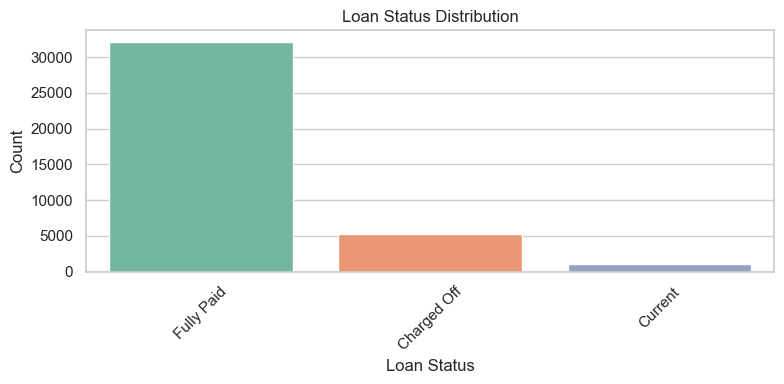

In [9]:
# 📊 Loan Status Count
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='loan_status', palette='Set2', order=df['loan_status'].value_counts().index)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_7016\4032807834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='grade', y='int_rate', estimator=np.mean, palette='coolwarm')


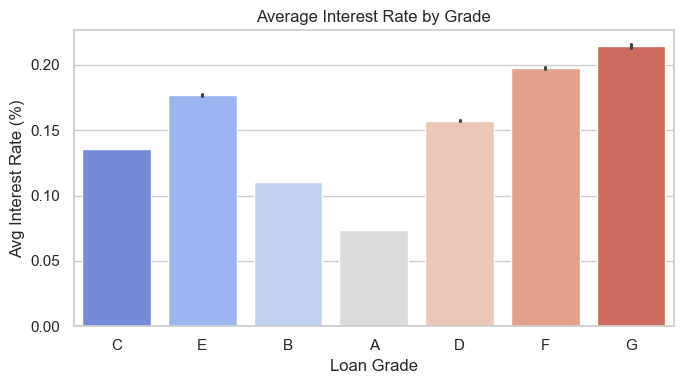

In [10]:

# 📊 Average Interest Rate by Grade
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='grade', y='int_rate', estimator=np.mean, palette='coolwarm')
plt.title('Average Interest Rate by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Avg Interest Rate (%)')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_7016\3902352103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_amount', palette='viridis')


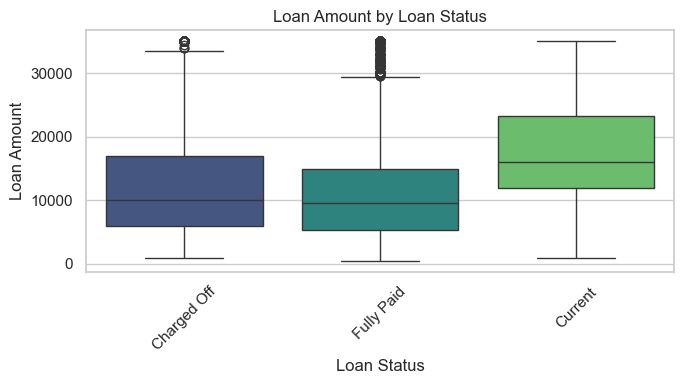

In [16]:
# 📊 Loan Amount by Loan Status (Boxplot)
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='loan_status', y='loan_amount', palette='viridis')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_7016\3414405854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index, palette='pastel')


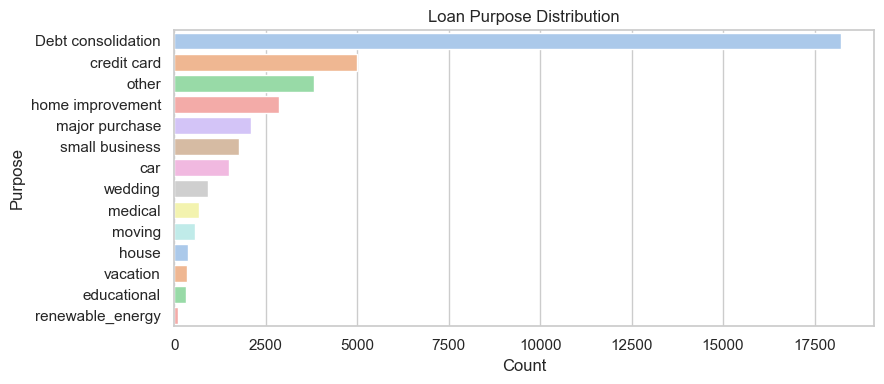

In [12]:
# 📊 Loan Purpose Breakdown
plt.figure(figsize=(9, 4))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index, palette='pastel')
plt.title('Loan Purpose Distribution')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_7016\111805156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='emp_length', y='dti', estimator=np.mean, palette='cubehelix')


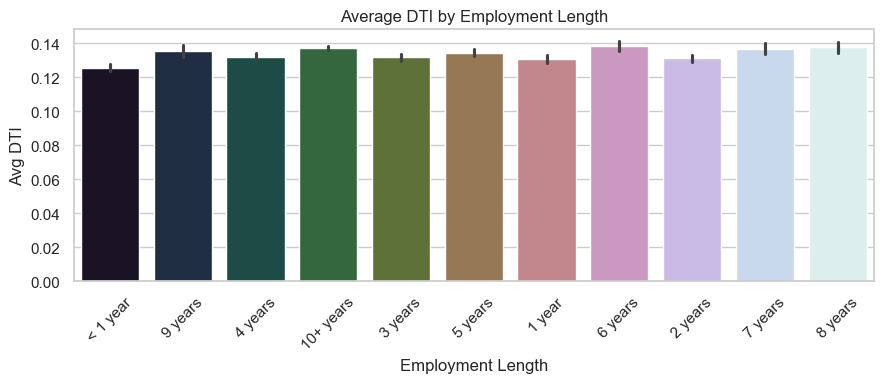

In [13]:
# 📊 Average DTI by Employment Length
plt.figure(figsize=(9, 4))
sns.barplot(data=df, x='emp_length', y='dti', estimator=np.mean, palette='cubehelix')
plt.title('Average DTI by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Avg DTI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_7016\3870820727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='mako')


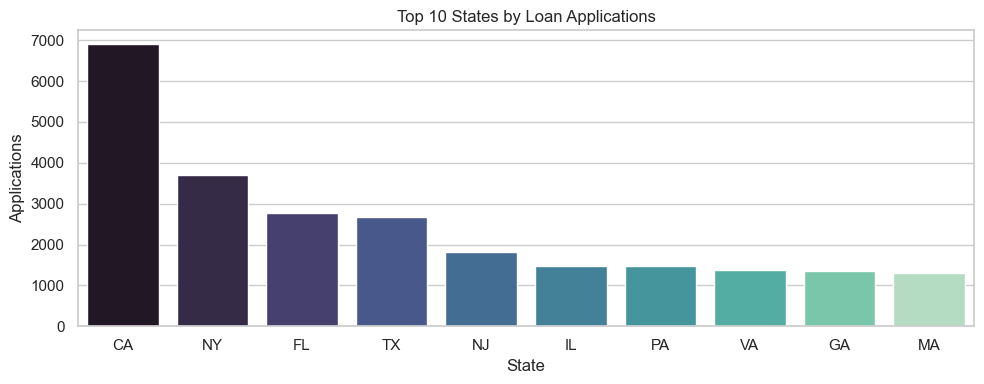

In [14]:

# 📊 Loan Applications by State (Top 10)
plt.figure(figsize=(10, 4))
top_states = df['address_state'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='mako')
plt.title("Top 10 States by Loan Applications")
plt.xlabel("State")
plt.ylabel("Applications")
plt.tight_layout()
plt.show()

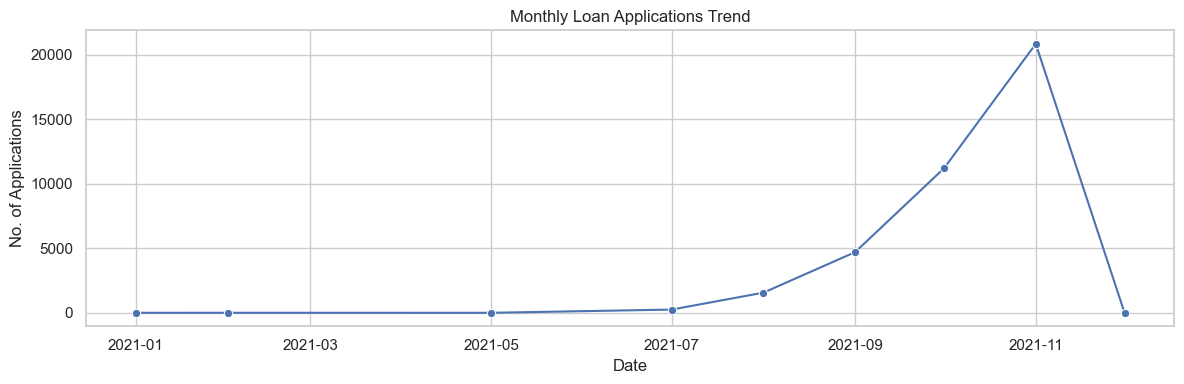

In [15]:
# 📊 Monthly Trend (Applications)
monthly_trend = df.groupby(['year', 'month'])['id'].count().reset_index()
monthly_trend['date'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 4))
sns.lineplot(data=monthly_trend, x='date', y='id', marker='o')
plt.title("Monthly Loan Applications Trend")
plt.xlabel("Date")
plt.ylabel("No. of Applications")
plt.tight_layout()
plt.show()